<a href="https://colab.research.google.com/github/akshitgupta/Language-translator/blob/main/NMT_coding_ninjas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Libraries

In [ ]:
from keras.models import Model
from keras.layers import Input, LSTM, GRU, Dense, Embedding
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [ ]:
BATCH_SIZE = 64
EPOCHS = 20
LSTM_NODES =256
NUM_SENTENCES = 20000
MAX_SENTENCE_LENGTH = 50
MAX_NUM_WORDS = 20000
EMBEDDING_SIZE = 200

#Data Preprocessing

In [ ]:
input_sentences = []
output_sentences = []
output_sentences_inputs = []

count = 0
for line in open('fra.txt', encoding="utf-8"):
    count += 1
    if count > NUM_SENTENCES:
        break
    if '\t' not in line:
        continue
    input_sentence = line.rstrip().split('\t')[0]
    input_sentence= input_sentence.lower()
    output = line.rstrip().split('\t')[1]
    output= output.lower()

    output_sentence = output + ' <eos>'
    output_sentence_input = '<sos> ' + output

    input_sentences.append(input_sentence)
    output_sentences.append(output_sentence)
    output_sentences_inputs.append(output_sentence_input)

print("Number of sample input:", len(input_sentences))
print("Number of sample output:", len(output_sentences))
print("Number of sample output input:", len(output_sentences_inputs))

Number of sample input: 20000
Number of sample output: 20000
Number of sample output input: 20000


#Random Print

In [ ]:
print("English sentence: ",input_sentences[150])
print("French translation: ",output_sentences[150])

English sentence:  be calm.
French translation:  soyez calme ! <eos>


#Tokenization and Padding

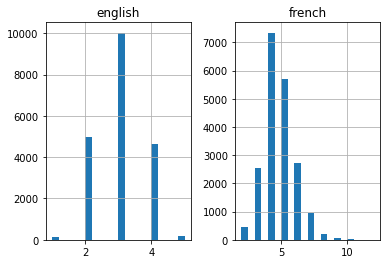

In [ ]:
# let’s visualise the length of the sentences.
import pandas as pd

eng_len = []
fren_len = []

# populate the lists with sentence lengths
for i in input_sentences:
      eng_len.append(len(i.split()))  

for i in output_sentences:
      fren_len.append(len(i.split()))

length_df = pd.DataFrame({'english':eng_len, 'french':fren_len})

length_df.hist(bins = 20)
plt.show()

In [ ]:
#tokenize the input sentences(input language) 
input_tokenizer = Tokenizer(num_words=MAX_NUM_WORDS)
input_tokenizer.fit_on_texts(input_sentences)
input_integer_seq = input_tokenizer.texts_to_sequences(input_sentences)
print(input_integer_seq)

word2idx_inputs = input_tokenizer.word_index
print('Total unique words in the input: %s' % len(word2idx_inputs))

max_input_len = max(len(sen) for sen in input_integer_seq)
print("Length of longest sentence in input: %g" % max_input_len)

#with open('input_tokenizer_NMT.pickle', 'wb') as handle:
#    pickle.dump(input_tokenizer, handle, protocol=4)

[[18], [18], [18], [532], [532], [129], [129], [129], [129], [129], [129], [129], [129], [129], [129], [129], [129], [129], [129], [129], [129], [67], [2411], [1433], [1433], [1433], [720], [58], [847], [847], [660], [660], [53], [53], [53], [104], [104], [104], [104], [104], [104], [104], [721], [721], [18, 43], [18, 43], [18, 43], [612], [612], [1, 61], [1, 61], [1, 76], [1, 185], [1, 185], [1, 185], [722, 29], [370], [370], [370], [370], [370], [370], [370], [370], [370], [370], [370], [370], [563], [563], [563], [223], [613], [613], [613], [233, 4], [233, 4], [233, 4], [233, 4], [1209], [1209], [1209], [1209], [106, 4], [106, 4], [32, 35], [32, 35], [32, 35], [18, 71], [18, 71], [18, 71], [59, 4], [59, 4], [59, 4], [59, 4], [59, 4], [59, 4], [1771, 38], [1771, 38], [477, 8], [477, 8], [1, 355], [1, 355], [1, 2412], [1, 1772], [1, 73], [1, 145], [1, 145], [1, 371], [1, 85], [1, 313], [1, 313], [1, 313], [1, 198], [1, 198], [7, 2413], [7, 142], [7, 142], [278], [29, 212], [29, 212], 

In [ ]:
#tokenize the output sentences(Output language)
output_tokenizer = Tokenizer(num_words=MAX_NUM_WORDS, filters='')
output_tokenizer.fit_on_texts(output_sentences + output_sentences_inputs)
output_integer_seq = output_tokenizer.texts_to_sequences(output_sentences)
output_input_integer_seq = output_tokenizer.texts_to_sequences(output_sentences_inputs)
print(output_input_integer_seq)

word2idx_outputs = output_tokenizer.word_index
print('Total unique words in the output: %s' % len(word2idx_outputs))

num_words_output = len(word2idx_outputs) + 1
max_out_len = max(len(sen) for sen in output_integer_seq)
print("Length of longest sentence in the output: %g" % max_out_len)

#with open('output_tokenizer_NMT.pickle', 'wb') as handle:
#    pickle.dump(output_tokenizer, handle, protocol=4)

[[2, 51, 4], [2, 694], [2, 426, 4], [2, 886, 4], [2, 4524], [2, 2662], [2, 2663], [2, 131, 239, 1025, 18, 239, 1937, 4], [2, 1496, 4], [2, 1938, 4], [2, 777, 4], [2, 2664, 4], [2, 2665, 4], [2, 2662], [2, 2663], [2, 131, 239, 1025, 18, 239, 1937, 4], [2, 1496, 4], [2, 1938, 4], [2, 777, 4], [2, 2664, 4], [2, 2665, 4], [2, 37, 6], [2, 28, 4525], [2, 18, 4526], [2, 4527], [2, 4528], [2, 65, 778, 4], [2, 18, 2666], [2, 4529], [2, 4530], [2, 1939], [2, 1939], [2, 28, 2667], [2, 4531], [2, 1204, 4], [2, 288, 4], [2, 341, 4], [2, 1026], [2, 288, 4], [2, 341, 4], [2, 4532], [2, 1026], [2, 1940], [2, 2668], [2, 4533], [2, 4534], [2, 4535], [2, 1027, 4], [2, 886, 4], [2, 3, 887], [2, 4536], [2, 2669], [2, 17, 398, 4], [2, 3, 68, 1028, 4], [2, 190, 382], [2, 2670, 558, 4], [2, 1205], [2, 1941], [2, 1942], [2, 2671, 2672], [2, 2673, 2674], [2, 46, 1497], [2, 1943, 4], [2, 1206, 4], [2, 2675], [2, 1207, 4], [2, 46, 185], [2, 217], [2, 4537], [2, 2676, 94, 19, 1208], [2, 4538], [2, 1498, 6], [2, 26

In [ ]:
encoder_input_sequences = pad_sequences(input_integer_seq, maxlen=max_input_len)
print("encoder_input_sequences.shape:", encoder_input_sequences.shape)
print("encoder_input_sequences[180]:", encoder_input_sequences[180])

encoder_input_sequences.shape: (20000, 5)
encoder_input_sequences[180]: [  0   0   0 301   4]


In [ ]:
decoder_input_sequences = pad_sequences(output_input_integer_seq, maxlen=max_out_len, padding='post')
print("decoder_input_sequences.shape:", decoder_input_sequences.shape)
print("decoder_input_sequences[180]:", decoder_input_sequences[180])

decoder_input_sequences.shape: (20000, 12)
decoder_input_sequences[180]: [   2 4571   14  127    0    0    0    0    0    0    0    0]


In [ ]:
decoder_output_sequences = pad_sequences(output_integer_seq, maxlen=max_out_len, padding='post')
print("decoder_output_sequences.shape:", decoder_output_sequences.shape)

decoder_output_sequences.shape: (20000, 12)


#Word Embeddings

Using Pre-trained Glove vector

In [ ]:
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()

glove_file = open(r'glove.twitter.27B.200d.txt', encoding="utf8",errors='ignore')

for line in glove_file:
    rec = line.split()
    word = rec[0]
    vector_dimensions = asarray(rec[1:], dtype='float32')
    embeddings_dictionary[word] = vector_dimensions
glove_file.close()

num_words = min(MAX_NUM_WORDS, len(word2idx_inputs) + 1)
embedding_matrix = zeros((num_words, EMBEDDING_SIZE))
for word, index in word2idx_inputs.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

Creating embedding layer for input

In [ ]:
embedding_layer = Embedding(num_words, EMBEDDING_SIZE, weights=[embedding_matrix], input_length=max_input_len)

In [ ]:
decoder_targets_one_hot = np.zeros((
        len(input_sentences),
        max_out_len,
        num_words_output
    ),
    dtype='float32'
)
decoder_targets_one_hot.shape

(20000, 12, 9529)

In [ ]:
for i, d in enumerate(decoder_output_sequences):
    for t, word in enumerate(d):
        decoder_targets_one_hot[i, t, word] = 1

In [ ]:
encoder_inputs = Input(shape=(max_input_len,))
x = embedding_layer(encoder_inputs)
encoder = LSTM(LSTM_NODES, return_state=True)

encoder_outputs, h, c = encoder(x)
encoder_states = [h, c]

In [ ]:
decoder_inputs = Input(shape=(max_out_len,))

decoder_embedding = Embedding(num_words_output, LSTM_NODES)
decoder_inputs_x = decoder_embedding(decoder_inputs)

decoder_lstm = LSTM(LSTM_NODES, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_inputs_x, initial_state=encoder_states)

In [ ]:

decoder_dense = Dense(num_words_output, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

In [ ]:
#Compile
model = Model([encoder_inputs,decoder_inputs], decoder_outputs)
model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 5)]          0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 12)]         0           []                               
                                                                                                  
 embedding (Embedding)          (None, 5, 200)       690600      ['input_1[0][0]']                
                                                                                                  
 embedding_1 (Embedding)        (None, 12, 256)      2439424     ['input_2[0][0]']                
                                                                                              

Ploting Model

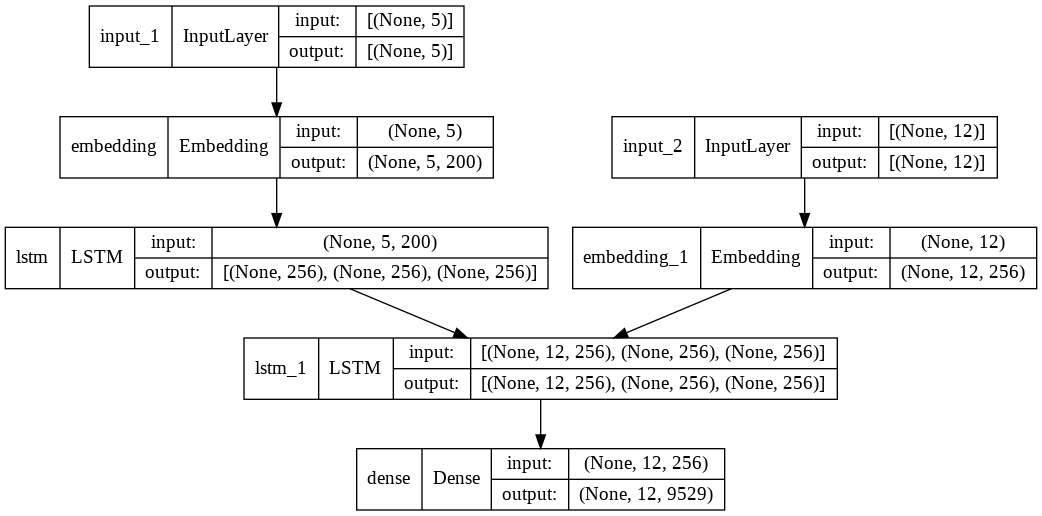

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot4a.png', show_shapes=True, show_layer_names=True)

In [ ]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

In [ ]:
history = model.fit([encoder_input_sequences, decoder_input_sequences], decoder_targets_one_hot,
    batch_size=BATCH_SIZE,
    epochs=20,
    callbacks=[es],
    validation_split=0.1,
)

Epoch 1/20
282/282 [==============================] - 149s 505ms/step - loss: 2.0395 - accuracy: 0.7208 - val_loss: 2.0754 - val_accuracy: 0.7078
Epoch 2/20
282/282 [==============================] - 143s 508ms/step - loss: 1.4619 - accuracy: 0.7858 - val_loss: 1.8600 - val_accuracy: 0.7405
Epoch 00002: early stopping


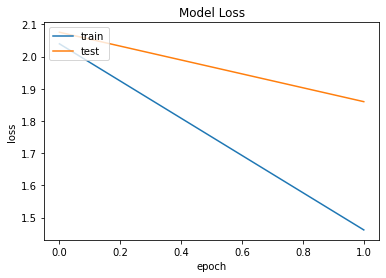

In [ ]:
import matplotlib.pyplot as plt
# %matplotlib inline
plt.title('Model Loss')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model.save('seq2seq_eng-fra.h5')

In [ ]:
encoder_model = Model(encoder_inputs, encoder_states)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy')
model.load_weights('seq2seq_eng-fra.h5')

In [ ]:
decoder_state_input_h = Input(shape=(LSTM_NODES,))
decoder_state_input_c = Input(shape=(LSTM_NODES,))
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]

decoder_inputs_single = Input(shape=(1,))
decoder_inputs_single_x = decoder_embedding(decoder_inputs_single)
decoder_outputs, h, c = decoder_lstm(decoder_inputs_single_x, initial_state=decoder_states_inputs)
decoder_states = [h, c]
decoder_outputs = decoder_dense(decoder_outputs)
decoder_model = Model(
    [decoder_inputs_single] + decoder_states_inputs,
    [decoder_outputs] + decoder_states
)


Making Predictions

In [ ]:
idx2word_input = {v:k for k, v in word2idx_inputs.items()}
idx2word_target = {v:k for k, v in word2idx_outputs.items()}

The method will accept an input-padded sequence English sentence (in the integer form) and will return the translated French sentence.

In [ ]:
def translate_sentence(input_seq):
    states_value = encoder_model.predict(input_seq)
    target_seq = np.zeros((1, 1))
    target_seq[0, 0] = word2idx_outputs['<sos>']
    eos = word2idx_outputs['<eos>']
    output_sentence = []

    for _ in range(max_out_len):
        output_tokens, h, c = decoder_model.predict([target_seq] + states_value)
        idx = np.argmax(output_tokens[0, 0, :])

        if eos == idx:
            break

        word = ''

        if idx > 0:
            word = idx2word_target[idx]
            output_sentence.append(word)

        target_seq[0, 0] = idx
        states_value = [h, c]

    return ' '.join(output_sentence)

In [ ]:
i = np.random.choice(len(input_sentences))
input_seq = encoder_input_sequences[i:i+1]
translation = translate_sentence(input_seq)
print('Input Language : ', input_sentences[i])
print('Actual translation : ', output_sentences[i])
print('French translation : ', translation)

Input Language :  tom is tall.
Actual translation :  tom est grand. <eos>
French translation :  tom est est train


In [ ]:
o=list(output_sentences[i].split())
l=[]
l.append(o)
t=translation.split()
l

[['tom', 'est', 'grand.', '<eos>']]

In [ ]:
from nltk.translate.bleu_score import sentence_bleu

score = sentence_bleu(l,t, weights=(1, 0, 0, 0))
print(score)

0.5


/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 3-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)
